# Heart Disease Prediction using Machine Learning Approach.

### Task -->
##### We have performed Supervised Machine Learning using Classification techniques and Exploratory Data Analysis on Heart Disease Prediction dataset.

##### The main problems to be solved by this Data Science task have been properly framed, in terms of client's goals, background information and the purpose of task. This ensures that the task is understood and explored to better inform the decision-making process on the possible range of approaches and solutions to the problems.

##### Here we will extract relevant, representative, and sufficient case study data from a reputable and reliable online source. We are gonna perform appropriate preprocessing adjustments and data exploration on the data to ensure reliable and reasonable outcomes and outputs.

##### For the data mining and modelling process, the popular classifier models of Decision Tree, K-Nearest Neighbor, Logistic Regression, Random Forest Classifier and Support Vector Classifier are to be fitted, analysed, and evaluated in terms of the performance metrics of accuracy, precision, recall and F1-score in predicting the classifications of heart disease. All significant interpretations and observations will be noted and considered for future improvements.

##### The primary focus will be on heart-related factors, which are a range of health measurements including 'CerebralPalsy', 'Cholestrol', 'BloodPressure', 'BloodSugar', 'GeartRate', 'RestingElectrocardiographic', 'ExeInducedAnging', 'No.ofVessels' and 'Age' as predictors. Analysing these will help us to identify concerned areas and assess/predict the heart disease outcome.

##### This project is divided into 10 major steps which are as follows:

1. Data description
2. Importing Libraries & setting up environment
3. Loading dataset
4. Data Cleaning & Preprocessing
5. Exploratory Data Analysis
6. OUtlier Detection & Removal
7. Training & Test Split
8. Model Building
9. Model Evaluation and Comaprison
10. Conclusion




### 1. Dataset description
##### This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 0 typical, 1 typical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)
12. ca: Number of major vessels
13. thal:  A blood disorder called thalassemia.

Target variable

14. target: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.



### 2. Importing libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### 3. Loading Dataset


##### The initial step of our Data Science task is to obtain, gather and measure the necessary and targeted data from available internal or external data sources and then compile them into an established system.

In [136]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('Downloads/heart.csv')

In [137]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

In [138]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

### 4. Data cleaning and Preprocessing

##### In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables.

In [139]:
# renaming features to proper name
heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_color_vessel', 'thalassemia', 'target']

In [140]:
# converting features to categorical features 

# [heart_data['sex'] == 0] = 'female'
# [heart_data['sex'] == 1] = 'male'

# [heart_data['chest_pain_type'] == 0] = 'typical angina'
# [heart_data['chest_pain_type'] == 1] = 'atypical angina'
# [heart_data['chest_pain_type'] == 2] = 'non-anginal pain'
# [heart_data['chest_pain_type'] == 3] = 'asymptomatic'

# [heart_data['rest_ecg'] == 0] = 'normal'
# [heart_data['rest_ecg'] == 1] = 'ST-T wave abnormality'
# [heart_data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

# [heart_data['st_slope'] == 0] = 'upsloping'
# [heart_data['st_slope'] == 1] = 'flat'
# [heart_data['st_slope'] == 2] = 'downsloping'

# [heart_data['target'] == 0] = 'no disease'
# [heart_data['target'] == 1] = 'disease'

In [141]:
heart_data['chest_pain_type'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

In [142]:
heart_data['rest_ecg'].value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

In [143]:
heart_data['st_slope'].value_counts()

2    142
1    140
0     21
Name: st_slope, dtype: int64

In [144]:
# checking the top 5 entries of dataset after feature encoding
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_color_vessel,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
## Checking missing entries in the dataset columnwise
heart_data.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
major_color_vessel         0
thalassemia                0
target                     0
dtype: int64

##### So, there are no missing entries in the dataset thats great. Next we will move towards exploring the dataset by performing detailed EDA.

### 5. Exploratory Data Analysis (EDA) 

In [146]:
# first checking the shape of the dataset
heart_data.shape

(303, 14)

In [147]:
heart_data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_color_vessel,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [150]:
# summary statistics of categorical columns
heart_data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_color_vessel,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Distribution of Heart disease (target variable)

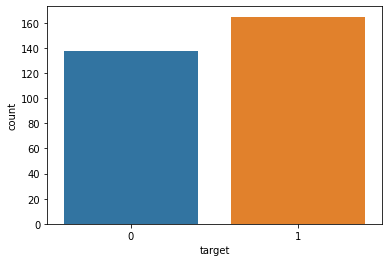

1    165
0    138
Name: target, dtype: int64


In [151]:
#Plotting the outcome col. histogram

sns.countplot(x= 'target',data= heart_data)
plt.show()
y=heart_data.target.value_counts()
print(y)

### Checking gender distribution

In [152]:
heart_data["sex"].unique()

array([1, 0], dtype=int64)

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

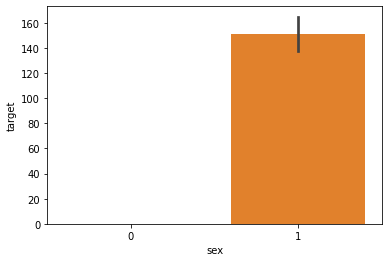

In [153]:
sns.barplot(heart_data["sex"],y)

##### As we can see from above plot, in this dataset males percentage is way too higher than females.

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


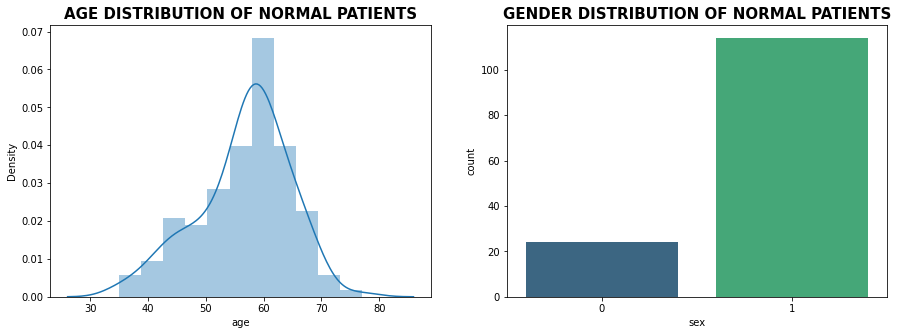

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


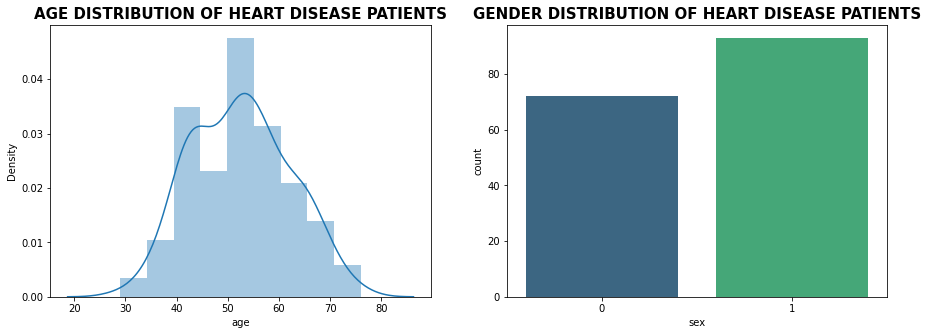

In [154]:
# creating separate df for normal and heart patients

attr_1=heart_data[heart_data['target']==1]

attr_0=heart_data[heart_data['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

#### As we can see from above plot male patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 56 to 60 years.

### Distribution of Chest pain type

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


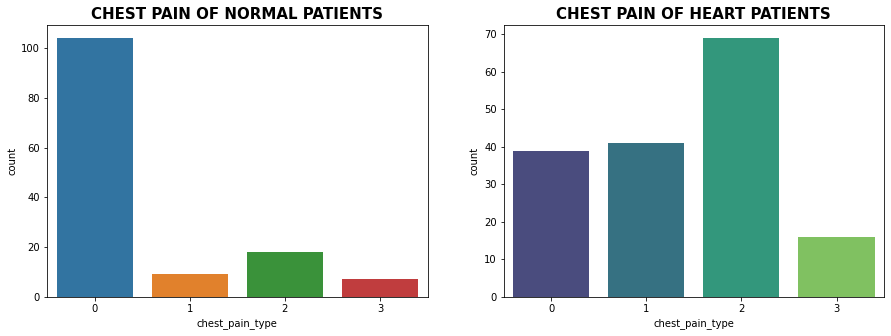

In [155]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [156]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2))

target,0,1
chest_pain_type,,
0,75.36,23.64
1,6.52,24.85
2,13.04,41.82
3,5.07,9.70


##### As we can see from above plot 41% of the chest pain type of the heart disease patients have non-anginal chest pain.

### Distribution of rest ECG

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


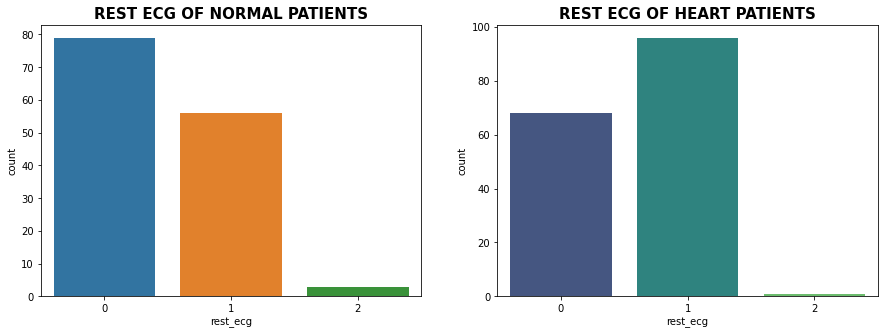

In [157]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [158]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2))

target,0,1
rest_ecg,,
0,57.25,41.21
1,40.58,58.18
2,2.17,0.61


#####  In this dataset around 41% heart disease patients have normal ECG.

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


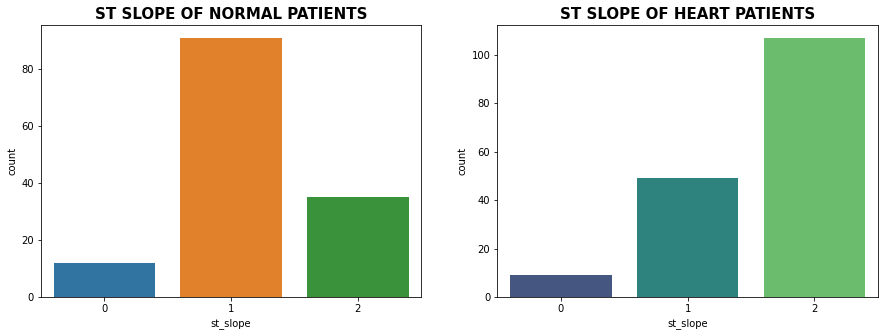

In [159]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [160]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2))

target,0,1
st_slope,,
0,8.70,5.45
1,65.94,29.70
2,25.36,64.85


##### As we can see from above plot that 65.94% of the normal patients have flat sloping whereas 64.85% heart patients have down sloping.

### Distribution of Numerical features.

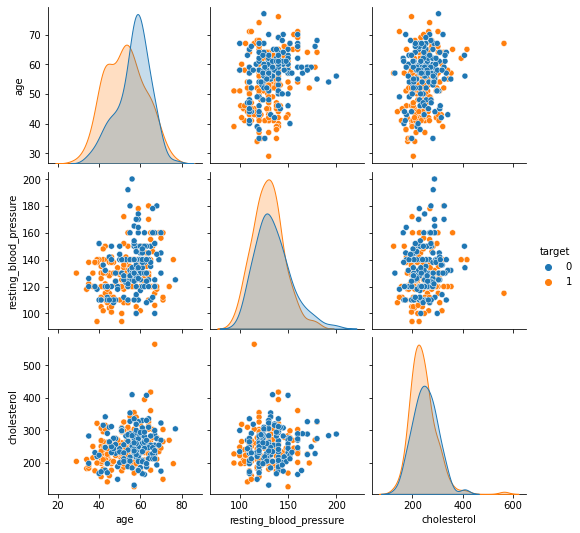

In [161]:
sns.pairplot(heart_data, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

##### From the above plot it is clear that as the resting blood pressure and cholestrol increases chances of heart disease increases.

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

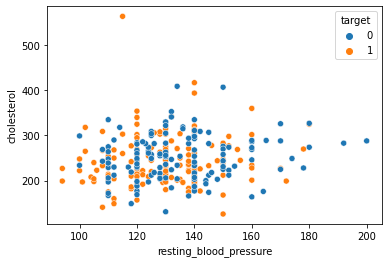

In [162]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = heart_data)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

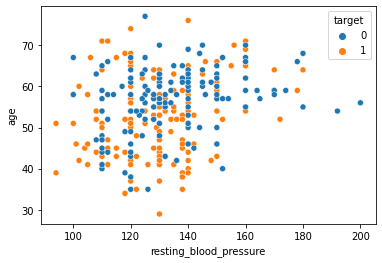

In [163]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = heart_data)

# 6. Outlier Detection

In [164]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = heart_data[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [165]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163


In [166]:
continous_features = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']  
def outliers(heart_data_out, drop = False):
    for each_feature in heart_data_out.columns:
        feature_data = heart_data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(heart_data[continous_features])

For the feature age, No of Outliers is 0
For the feature resting_blood_pressure, No of Outliers is 9
For the feature cholesterol, No of Outliers is 5
For the feature max_heart_rate_achieved, No of Outliers is 1


<AxesSubplot:ylabel='max_heart_rate_achieved'>

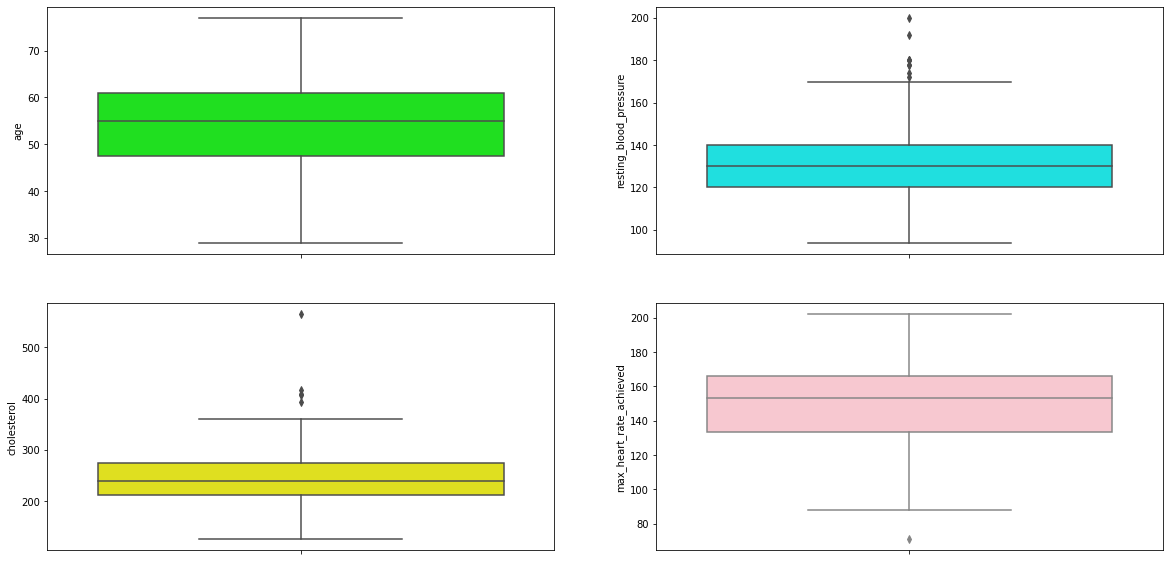

In [167]:
#Outlier distribution of the features
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 10))
sns.boxplot(y = heart_data['age'], ax = axes[0,0],color='lime')
sns.boxplot(y = heart_data['resting_blood_pressure'], ax = axes[0,1],color='cyan')
sns.boxplot(y = heart_data['cholesterol'], ax = axes[1,0],color='yellow')
sns.boxplot(y = heart_data['max_heart_rate_achieved'], ax = axes[1,1],color='pink')

<AxesSubplot:ylabel='resting_blood_pressure'>

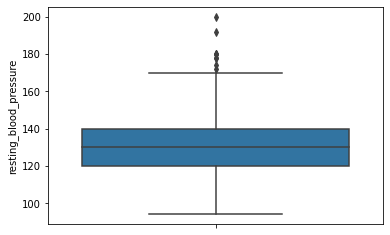

In [168]:
#Boxplot of trestbps to check for outliers
sns.boxplot(y = heart_data['resting_blood_pressure'])

In [169]:
# Summary statistics of trestbps
print(heart_data['resting_blood_pressure'].describe())
iqr_pr = heart_data['resting_blood_pressure'].describe()['75%'] - heart_data['resting_blood_pressure'].describe()['25%']
print('Inter Quartile Range ', iqr_pr)
lower_limit_pr = heart_data['resting_blood_pressure'].describe()['25%'] - (1.5 * iqr_pr)
upper_limit_pr = heart_data['resting_blood_pressure'].describe()['75%'] + (1.5 * iqr_pr)
print('Lower Limit ', lower_limit_pr)
print('Upper Limit ', upper_limit_pr)

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_pressure, dtype: float64
Inter Quartile Range  20.0
Lower Limit  90.0
Upper Limit  170.0


<AxesSubplot:ylabel='resting_blood_pressure'>

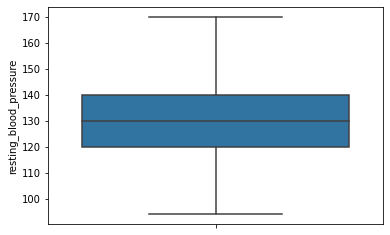

In [170]:
#Replacing outliers with 2nd Quartile value
# target 0
heart_data.loc[(heart_data['resting_blood_pressure'] > upper_limit_pr) & (heart_data['target'] == 0), 'resting_blood_pressure'] = heart_data[heart_data['target'] == 0]['resting_blood_pressure'].describe()['50%']
# target 1
heart_data.loc[(heart_data['resting_blood_pressure'] > upper_limit_pr) & (heart_data['target'] == 1), 'resting_blood_pressure'] = heart_data[heart_data['target'] == 1]['resting_blood_pressure'].describe()['50%']
sns.boxplot(y = heart_data['resting_blood_pressure'])

<AxesSubplot:ylabel='cholesterol'>

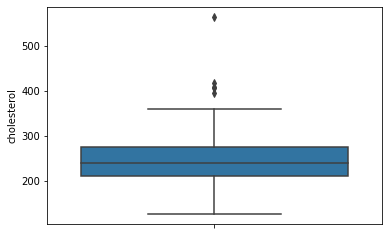

In [171]:
#Boxplot of chol to check for outliers
sns.boxplot(y = heart_data['cholesterol'])

In [172]:
# Summary statistics of trestbps
print(heart_data['cholesterol'].describe())
iqr_pr = heart_data['cholesterol'].describe()['75%'] - heart_data['cholesterol'].describe()['25%']
print('Inter Quartile Range ', iqr_pr)
lower_limit_pr = heart_data['cholesterol'].describe()['25%'] - (1.5 * iqr_pr)
upper_limit_pr = heart_data['cholesterol'].describe()['75%'] + (1.5 * iqr_pr)
print('Lower Limit ', lower_limit_pr)
print('Upper Limit ', upper_limit_pr)

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: cholesterol, dtype: float64
Inter Quartile Range  63.5
Lower Limit  115.75
Upper Limit  369.75


<AxesSubplot:ylabel='cholesterol'>

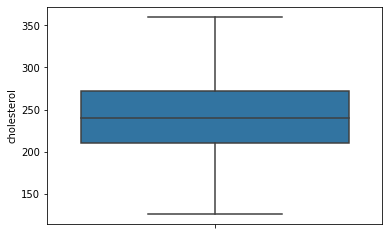

In [173]:
#Replacing outliers with 2nd Quartile value
# target 0
heart_data.loc[(heart_data['cholesterol'] > upper_limit_pr) & (heart_data['target'] == 0), 'cholesterol'] = heart_data[heart_data['target'] == 0]['cholesterol'].describe()['50%']
# target 1
heart_data.loc[(heart_data['cholesterol'] > upper_limit_pr) & (heart_data['target'] == 1), 'cholesterol'] = heart_data[heart_data['target'] == 1]['cholesterol'].describe()['50%']
sns.boxplot(y = heart_data['cholesterol'])

<AxesSubplot:ylabel='max_heart_rate_achieved'>

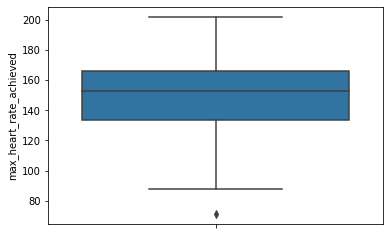

In [174]:
#Boxplot of thalach to check for outliers
sns.boxplot(y = heart_data['max_heart_rate_achieved'])

In [175]:
# Summary statistics of trestbps
print(heart_data['max_heart_rate_achieved'].describe())
iqr_pr = heart_data['max_heart_rate_achieved'].describe()['75%'] - heart_data['max_heart_rate_achieved'].describe()['25%']
print('Inter Quartile Range ', iqr_pr)
lower_limit_pr = heart_data['max_heart_rate_achieved'].describe()['25%'] - (1.5 * iqr_pr)
upper_limit_pr = heart_data['max_heart_rate_achieved'].describe()['75%'] + (1.5 * iqr_pr)
print('Lower Limit ', lower_limit_pr)
print('Upper Limit ', upper_limit_pr)

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_heart_rate_achieved, dtype: float64
Inter Quartile Range  32.5
Lower Limit  84.75
Upper Limit  214.75


<AxesSubplot:ylabel='max_heart_rate_achieved'>

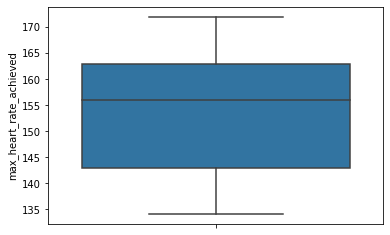

In [176]:
#Replacing outliers with quartile values
# target 0
heart_data.loc[(heart_data['max_heart_rate_achieved'] < heart_data['max_heart_rate_achieved'].describe()['25%']) & (heart_data['target'] == 0), 'max_heart_rate_achieved'] = heart_data[heart_data['target'] == 0][
'max_heart_rate_achieved'].describe()['50%']
heart_data.loc[(heart_data['max_heart_rate_achieved'] > heart_data['max_heart_rate_achieved'].describe()['75%']) & (heart_data['target'] == 0), 'max_heart_rate_achieved'] = heart_data[heart_data['target'] == 0][
'max_heart_rate_achieved'].describe()['75%']
# Outcome 1
heart_data.loc[(heart_data['max_heart_rate_achieved'] < heart_data['max_heart_rate_achieved'].describe()['25%']) & (heart_data['target'] == 1), 'max_heart_rate_achieved'] = heart_data[heart_data['target'] == 1][
'max_heart_rate_achieved'].describe()['50%']
heart_data.loc[(heart_data['max_heart_rate_achieved'] > heart_data['max_heart_rate_achieved'].describe()['75%']) & (heart_data['target'] == 1), 'max_heart_rate_achieved'] = heart_data[heart_data['target'] == 1][
'max_heart_rate_achieved'].describe()['75%']
sns.boxplot(y = heart_data['max_heart_rate_achieved'])

##### Now outliers have detected by inter quartile method.

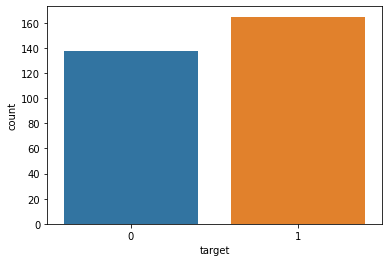

In [177]:
#Plotting the outcome col. histogram

sns.countplot(x= 'target',data= heart_data)
plt.show()

In [178]:
#splitting data into train and test datasets
X = heart_data.drop('target', axis=1)
Y = heart_data['target']

# 7. Train Test split

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =2)

In [180]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(Y_train.value_counts())

print('Distribution of traget variable in test set')
print(Y_test.value_counts())


Distribution of traget variable in training set
1    136
0    106
Name: target, dtype: int64
Distribution of traget variable in test set
0    32
1    29
Name: target, dtype: int64


In [181]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# 8. Model Building and Evaluation

### Decision Tree

In [182]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [183]:
decision_tree_pred = decision_tree.predict(X_test)

In [218]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, decision_tree_pred))

[[26  6]
 [ 4 25]]


In [219]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, decision_tree_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.81      0.86      0.83        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#### Accuracy of Decision Tree is 84%

### Logistic Regression

In [220]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)

C:\Users\NIKHIL PAL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [221]:
print(confusion_matrix(Y_test, logreg_pred))

[[26  6]
 [ 0 29]]


In [222]:
print(classification_report(Y_test, logreg_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



#### Accuracy of Logistic Regression is 90%

### K-Nearest Neighbours

In [223]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

In [224]:
print(confusion_matrix(Y_test, knn_pred))

[[23  9]
 [ 4 25]]


In [225]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



#### Accuracy of k nearest neighbour is 79%

### Random Forest

In [226]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, Y_train)
rand_forest_pred = rand_forest.predict(X_test)

In [227]:
print(confusion_matrix(Y_test, rand_forest_pred))

[[27  5]
 [ 3 26]]


In [228]:
print(classification_report(Y_test, rand_forest_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.84      0.90      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### Accuracy of Random forest is 87%

### Support Vector Classifier

In [229]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

In [230]:
print(confusion_matrix(Y_test, svm_pred))

[[12 20]
 [ 0 29]]


In [231]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        32
           1       0.59      1.00      0.74        29

    accuracy                           0.67        61
   macro avg       0.80      0.69      0.64        61
weighted avg       0.81      0.67      0.64        61



#### Accuracy of support vector classifier is 67%

### Naive bayes

In [232]:
from sklearn.naive_bayes import GaussianNB

In [233]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

naive_bayes_pred = naive_bayes.predict(X_test)

In [234]:
print(confusion_matrix(Y_test, naive_bayes_pred))

[[28  4]
 [ 2 27]]


In [236]:
print(classification_report(Y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



#### Accuracy of Naive bayes is 90%

## 9. Model Comparison
##### AS we can see from above results, Logistic Regression, Naive Bayes and Random Forest are the best performer as it has highest test accuracy of 0.90, 0.90 and 0.87. 

# ROC Curve

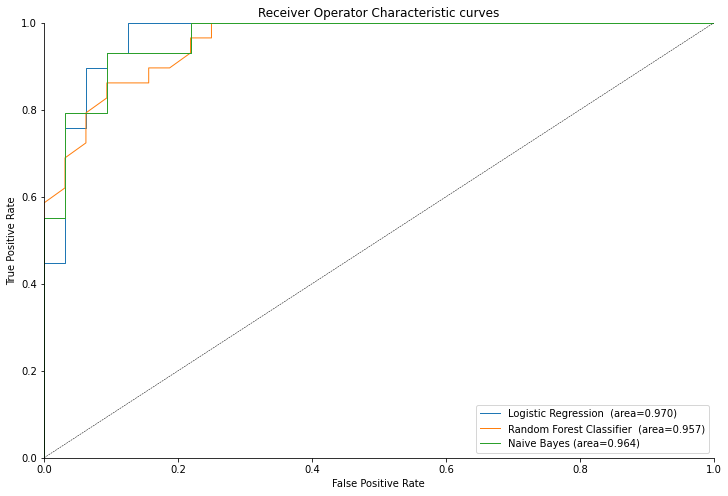

In [239]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(Y_test,logreg.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(Y_test,rand_forest.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(Y_test,naive_bayes.predict_proba(X_test),label='Naive Bayes',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

#### As we can see highest average area under the curve (AUC) of 0.970 is attained by Logistic Regression.

# 10. Conclusion

In [248]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


#### Since the predictive model has been build using logistic regression, therefore it is clear that for the given heart dataset logistic regression would be better to predict the future instances.